In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import altair as alt

from Tsbx_Exploratory import *
from Tbx_Clustering import *

In [2]:
with open('data_clean/data_compiled.pkl', 'rb') as file:
    df_CG_IPTU = pickle.load(file)

categories = ['A', 'B', 'C', 'D', 'E', 'F']

# Convert the 'Category' column to an ordinal categorical
df_CG_IPTU['Padrao'] = pd.Categorical(df_CG_IPTU['Padrao'], categories = categories, ordered = True)

df_CG_IPTU['Padrao'] = df_CG_IPTU['Padrao'].cat.codes.replace(-1,
                                                              -1)  # Or choose a specific value for missing, e.g., -1

df_CG_IPTU.head()

,DESC_RUA,NUMERO_RUA,Imovel_residencial,Imovel_vertical,Blocos,data_lancamento,Idade_predio,Unidades_andar,Andares_tipo,Total_Unidades,...,M2_Terreno,M2_util_cobertura,M2_total_cobertura,RS_total_unidade_tipo_IGPM,RS_por_M2_area_util_IGPM,RS_por_M2_area_total_IGPM,RS_total_cobertura_IGPM,CEP,FATOR DE OBSOLESCENCIA,Padrao
0,ABACATUAJA,500.0,1,0,1.0,2013-08-01,11.0,4.000000,2.0,8.0,...,500.0,-1.0,-1.0,3.541253e+05,7377.602434,5902.095227,-1.000000,08190-420,0.86,1
1,ABAGIBA,582.0,1,1,1.0,2016-04-01,8.0,6.000000,17.0,102.0,...,1467.5,-1.0,-1.0,7.894873e+05,12436.784078,6362.585522,-1.000000,04294-000,0.96,2
2,ABAGIBA,1200.0,1,1,2.0,2007-10-01,17.0,4.000000,10.5,84.0,...,2312.0,156.0,275.0,6.024159e+05,7171.619889,4212.685238,898892.901469,04294-000,0.88,2
3,ABAUNA,551.0,1,0,1.0,2013-09-01,11.0,2.666667,3.0,8.0,...,810.0,-1.0,-1.0,1.635443e+06,14098.654854,9345.380742,-1.000000,04284-080,0.92,2
4,ABDO AMBUBA,75.0,1,1,1.0,2003-11-01,20.0,4.000000,12.0,48.0,...,2062.0,-1.0,-1.0,8.594038e+05,9012.188700,3987.199768,-1.000000,05725-030,NaN,-1




**//**//**//**//**//**//**//**//**//**//**//**//**//**//**//**//**//**//**//**//
Clustering: kmeans, Seed: 23, Clusters: 2
Clustering: kmeans, Seed: 23, Clusters: 3
Clustering: kmeans, Seed: 23, Clusters: 7
Clustering: dbscan, Seed: 23, Clusters: 2
Clustering: dbscan, Seed: 23, Clusters: 3
Clustering: dbscan, Seed: 23, Clusters: 7
Clustering: agglomerative, Seed: 23, Clusters: 2
Clustering: agglomerative, Seed: 23, Clusters: 3
Clustering: agglomerative, Seed: 23, Clusters: 7


clustering                      agglomerative
n_clusters                                  3
seed                                     23.0
silhouette_score                     0.480758
davies_bouldin                       0.864615
calinski_harabasz                 2342.273463
davies_bouldin_normalized                 1.0
calinski_harabasz_normalized         0.566933
silhouette_normalized                     1.0
weighted_score                       3.028347
Name: 1, dtype: object



Best result for clustering                      agglomerative
n_clusters                                  3
seed                                     23.0
silhouette_score                     0.480758
davies_bouldin                       0.864615
calinski_harabasz                 2342.273463
davies_bouldin_normalized                 1.0
calinski_harabasz_normalized         0.566933
silhouette_normalized                     1.0
weighted_score                       3.028347
Name: 1, dtype: object


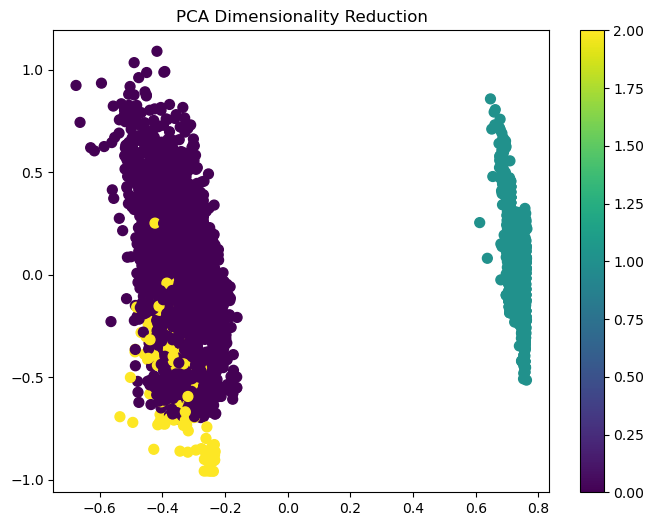

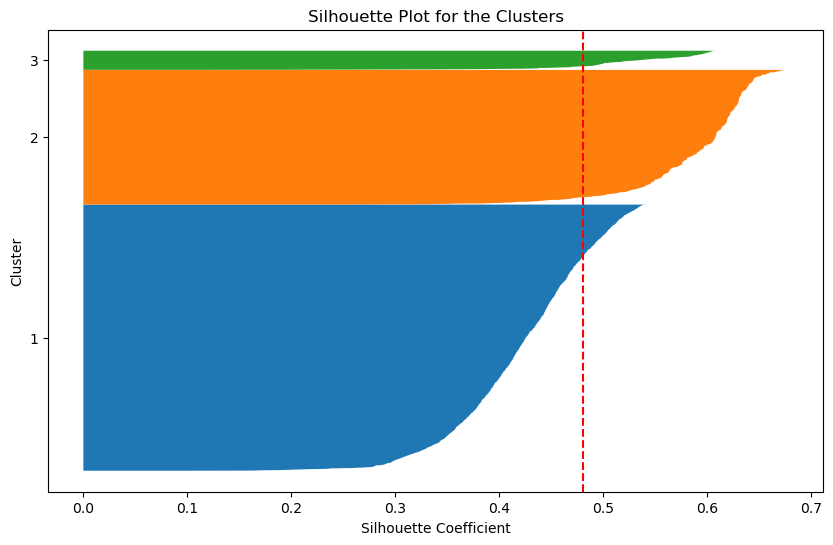

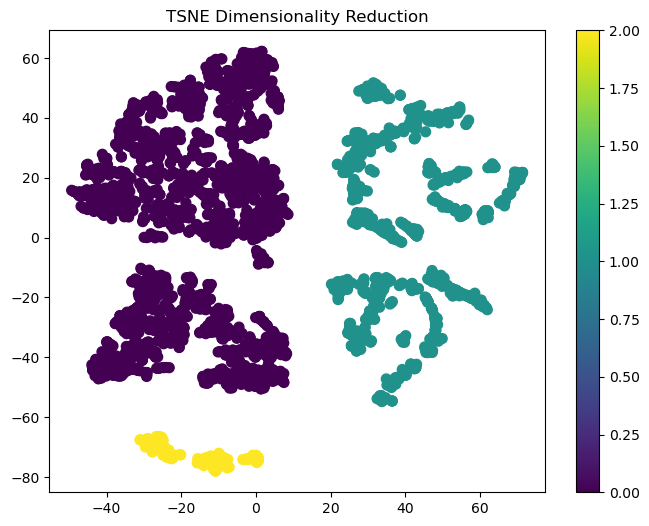

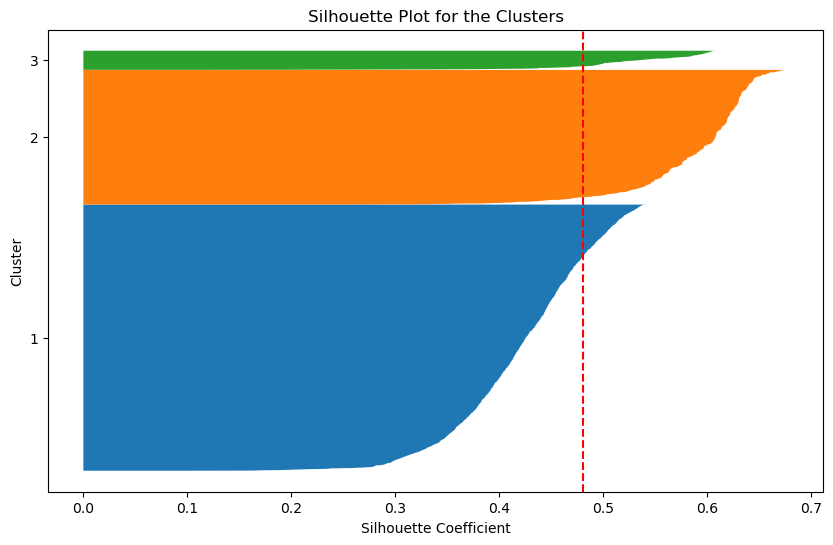

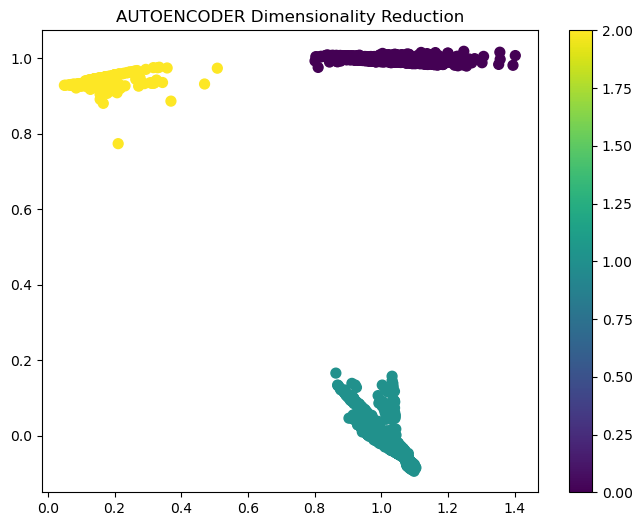

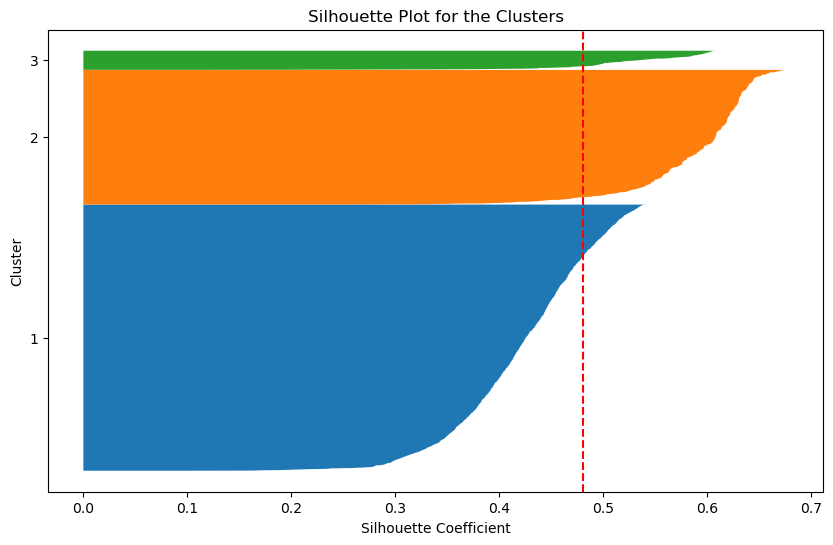

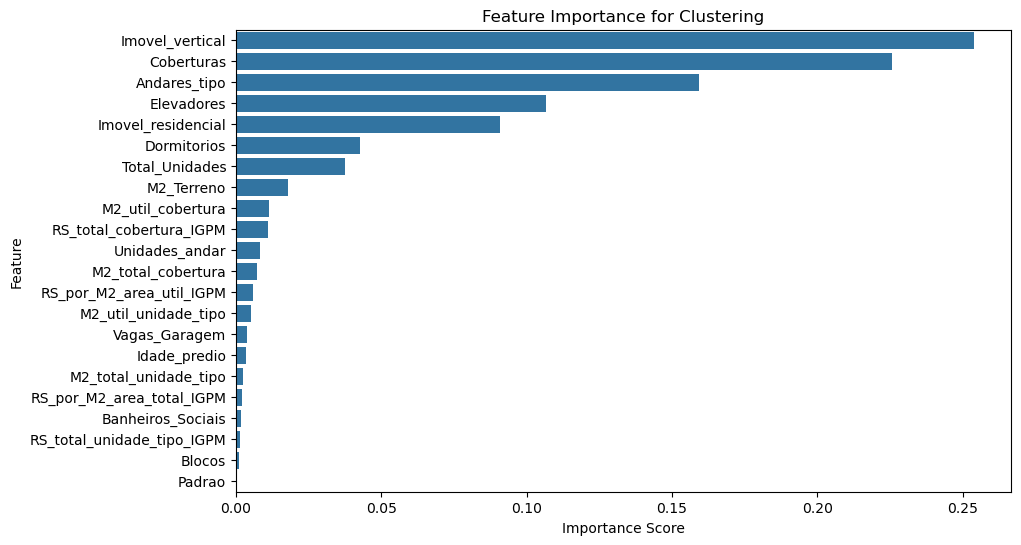

In [3]:
df_cluster = df_CG_IPTU.drop(
    columns = ['DESC_RUA', 'NUMERO_RUA', 'data_lancamento', 'CEP', 'FATOR DE OBSOLESCENCIA']).copy()

dimension_reduction_methods = ['pca', 'tsne', 'autoencoder']
cluster_methods = ['kmeans', 'dbscan', 'agglomerative']
seeds = [23]  # Example seed values
cluster_range = [2, 3, 7]  # Example cluster sizes


results_df = run_clustering_experiment(df_cluster, cluster_methods, seeds, cluster_range)

best_clustering = select_best_clustering(results_df, davies_weight = 1.0, calinski_weight = .05,
                                         silhouette_weight = 2.0)
display(best_clustering)

df_cluster_scaled = scale_data(X = df_cluster, y = None, normalize = 'minmax', split = False, random_state = 42)
cluster_labels = cluster_data(df_cluster_scaled, method = best_clustering['clustering'],
                              n_clusters = best_clustering['n_clusters'])
df_cluster['label_cluster'] = cluster_labels

print(f"\n\nBest result for {best_clustering}")
for dim in dimension_reduction_methods:
    _ = reduce_dimensions_and_plot(df_cluster_scaled, labels = cluster_labels, method = dim, n_components = 2)
    plot_silhouette(df_cluster_scaled, cluster_labels)

# Assuming df_cluster contains your features and cluster_labels contains the clustering results
feature_importance_df = evaluate_feature_importance(df_cluster, 'label_cluster')

# Plot the feature importance
plot_feature_importance(feature_importance_df)

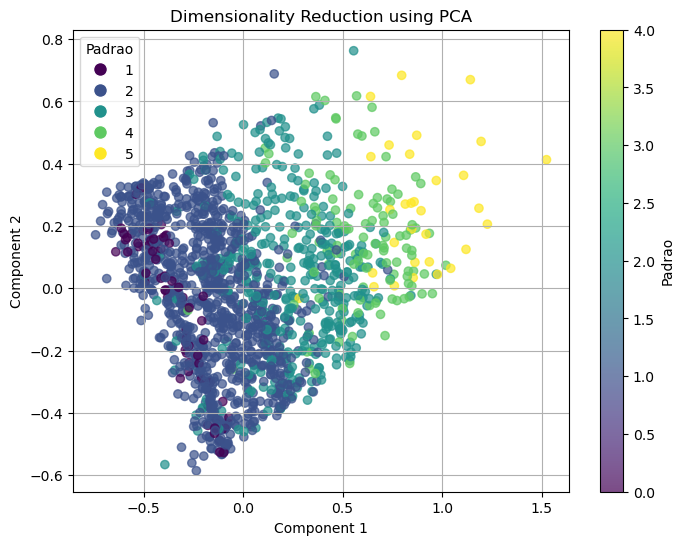

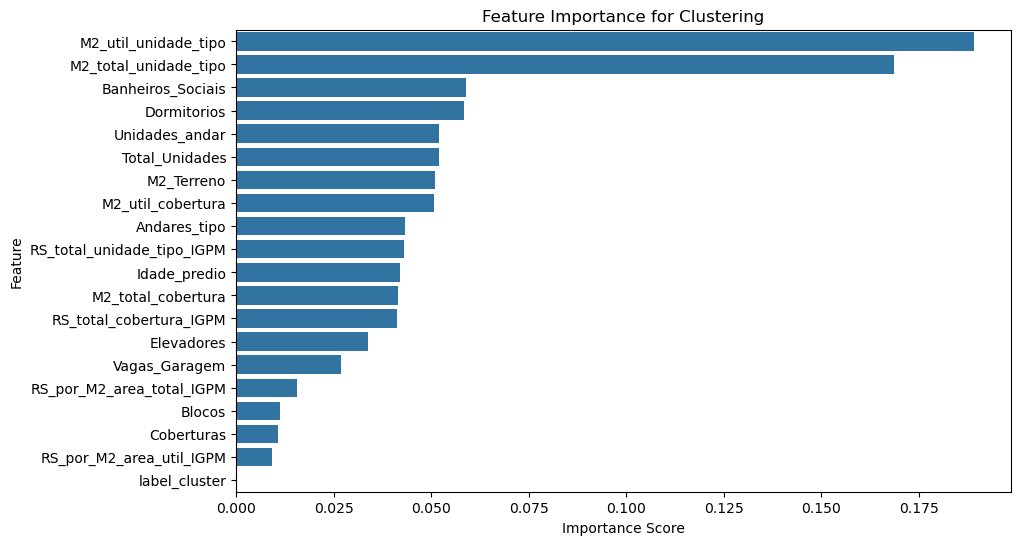

In [4]:
df_RES_VERT = df_cluster[(df_cluster['Imovel_residencial'] == 1) &
                         (df_cluster['Imovel_vertical'] == 1)].copy()

df_RES_VERT.drop(columns = ['Imovel_residencial', 'Imovel_vertical'], inplace = True)

df_RES_VERT_scaled = scale_data(X = df_RES_VERT.drop(columns = 'Padrao'), y = None, normalize = 'minmax',
                                split = False, stratify = None,
                                random_state = 42)

df_RES_VERT_scaled['Padrao'] = df_RES_VERT['Padrao']
df_RES_VERT_scaled = df_RES_VERT_scaled[df_RES_VERT_scaled['Padrao'] != -1]

df_PCA = dimensionality_reduction(df_RES_VERT_scaled, method = 'PCA', n_components = 2, target_column = 'Padrao',
                                  random_state = 42)


# for pad in df_RES_VERT_scaled['Padrao'].sort_values().unique():
#     df_aux = df_RES_VERT_scaled[df_RES_VERT_scaled['Padrao'] == pad]
#     _ = dimensionality_reduction(df_aux, method = 'PCA', n_components = 2, target_column = 'Padrao', random_state = 42)

# results_df = run_clustering_experiment(df_RES_VERT_scaled, cluster_methods, seeds, cluster_range)
# 
# best_clustering = select_best_clustering(results_df, davies_weight = .0, calinski_weight = .0, silhouette_weight = 2.0)
# display(best_clustering)
# 
# cluster_labels_RES_VERT = cluster_data(df_RES_VERT_scaled, method = best_clustering['clustering'],
#                                        n_clusters = best_clustering['n_clusters'])
# df_RES_VERT_scaled['label_cluster'] = cluster_labels_RES_VERT
# 
# print(f"\n\nBest result for {best_clustering}")
# for dim in dimension_reduction_methods[:-1]:
#     _ = reduce_dimensions_and_plot(df_RES_VERT_scaled, labels = cluster_labels_RES_VERT, method = dim, n_components = 2)
#     plot_silhouette(df_RES_VERT_scaled, cluster_labels_RES_VERT)
# 
# Assuming df_cluster_RES_VERT contains your features and cluster_labels contains the clustering results
feature_importance_df = evaluate_feature_importance(df_RES_VERT_scaled.dropna(), 'Padrao')

# Plot the feature importance
plot_feature_importance(feature_importance_df)

In [5]:
import altair as alt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


# Adding the update_plot function
def update_plot(df, cols, method):
    # Select relevant columns from df
    df_selected = df[cols]

    # Scale the selected columns
    df_scaled = scale_data(X = df_selected, y = None, normalize = 'minmax',
                           split = False, stratify = None,
                           random_state = 42)

    # Add 'Padrao' back to the scaled data
    df_scaled['Padrao'] = df['Padrao']

    # Remove rows with invalid 'Padrao'
    df_scaled = df_scaled[df_scaled['Padrao'] != -1]

    # Perform PCA transformation
    df_PCA = dimensionality_reduction(df_scaled, method = method, n_components = 2, target_column = 'Padrao',
                                      get_data = True, random_state = 42)

    # Create a selection for highlighting points by 'Padrao'
    highlight = alt.selection_point(fields = ['Padrao'], bind = 'legend')

    # Create the scatter plot
    scatter = alt.Chart(df_PCA).mark_point(filled = True).encode(
        x = 'PC1',
        y = 'PC2',
        color = alt.condition(highlight, 'Padrao:N', alt.value('lightgray')),
        tooltip = ['Padrao', 'PC1', 'PC2']
        ).properties(
        width = 500,
        height = 500
        ).add_params(
        highlight
        ).interactive()

    # Update the plot in the output widget
    with out:
        out.clear_output()  # Clear previous output
        display(scatter)


# Create a dropdown widget to select columns
columns = [col for col in df_RES_VERT.columns if col != 'Padrao']  # Exclude 'Padrao' from selection
column_selector = widgets.SelectMultiple(
    options = columns,
    value = ['Idade_predio', 'Andares_tipo', 'Banheiros_Sociais', 'M2_util_unidade_tipo', 'M2_total_unidade_tipo', 'M2_util_cobertura', 'M2_total_cobertura'],  # Default selected columns
    # tuple(feature_importance_df['feature'][:10]),
    # ['Idade_predio', 'Unidade_andar', 'Banheiros_Sociais', 'M2_total_unidade_tipo', 'M2_Terrreno', 'M2_total_cobertura']
    
    
    description = 'Columns',
    disabled = False,
    layout = widgets.Layout(width = '250px', height = '500px')  # Set custom width and height
    )

# Create a dropdown widget to select dimensionality reduction method
method_selector = widgets.Dropdown(
    options = ['PCA', 'tSNE', 'UMAP'],
    value = 'PCA',  # Default method
    description = 'Method',
    disabled = False,
    layout = widgets.Layout(width = '250px')  # Set width for the method selector
    )

# Create an output widget to hold the plot
out = widgets.Output()


# Define a function that updates the plot based on widget changes
def update_on_change(change):
    update_plot(df_plot, list(column_selector.value), method_selector.value)


# Attach the update function to the value change event of both widgets
column_selector.observe(update_on_change, names = 'value')
method_selector.observe(update_on_change, names = 'value')

# Display the plot and widgets side by side (HBox)
controls = widgets.VBox([column_selector, method_selector])  # Stack column selector and method selector vertically
dashboard = widgets.HBox([out, controls])  # Place controls to the right of the plot

# Display the entire layout
display(dashboard)

# Assuming df_RES_VERT and df_CG_IPTU are your actual data frames
df_plot = df_RES_VERT.copy()

# Initial plot with the default selected columns and method
update_plot(df_plot, list(column_selector.value), method_selector.value)

In [6]:
with open('data_clean/prototypes_IPTU_all.pkl', 'rb') as file:
    consumption_IPTU_all = pickle.load(file)

consumption_IPTU_all['index'] = consumption_IPTU_all['DESC_RUA'] + '_' + consumption_IPTU_all['NUMERO_RUA']
consumption_IPTU_all = consumption_IPTU_all.sort_values(by = ['index', 'Padrao', 'timestamp',])

df_plot = consumption_IPTU_all[['Padrao', 'timestamp', 'Consumo', 'index']].copy()
df_plot = df_plot.sort_values(by = ['index', 'Padrao', 'timestamp',])

df_plot

,Padrao,timestamp,Consumo,index
45698,2,2022-01-31,634.5,ABAGIBA_1200
47208,2,2022-02-28,767.5,ABAGIBA_1200
48718,2,2022-03-31,727.0,ABAGIBA_1200
398,2,2022-04-30,770.0,ABAGIBA_1200
1908,2,2022-05-31,777.5,ABAGIBA_1200
...,...,...,...,...
37801,1,2024-05-31,908.0,ZIKE TUMA_1221
39311,1,2024-06-30,872.0,ZIKE TUMA_1221
40821,1,2024-07-31,890.0,ZIKE TUMA_1221
42331,1,2024-08-31,862.0,ZIKE TUMA_1221


In [7]:
import altair as alt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

alt.data_transformers.disable_max_rows()

# Assuming consumption_IPTU_all is defined somewhere above
df_plot = consumption_IPTU_all[(consumption_IPTU_all['Consumo'] > 0)].copy()

# Ensure 'timestamp' and 'DATE' are in datetime format
df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])
df_plot['DATE'] = pd.to_datetime(df_plot['DATE'], format='%m-%d')
df_plot['DATE'] = df_plot['DATE'].apply(lambda x: x.replace(year=2023))

df_plot = df_plot.sort_values(by=['index', 'Padrao', 'DATE'])

# Step 1: Create a date slider
date_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df_plot['DATE'].sort_values().unique()).strftime('%Y-%m-%d').tolist(),
    value='2023-08-31',
    description='Select Date',
    continuous_update=False
)

# Step 2: Create sliders for consumption range selection
consumo_slider = widgets.FloatRangeSlider(
    value=[750, 2000],  # Adjusted to the maximum consumption value as per your data
    min=0,
    max=1400,  # Assuming the maximum based on your filtering logic
    step=1,
    description='Consumo Range',
    continuous_update=False
)

# Step 3: Create a SelectMultiple widget for selecting Padrao dynamically
padrao_selector = widgets.SelectMultiple(
    options=df_plot['Padrao'].sort_values().unique(),  # Use unique Padrao values from the dataframe
    value=tuple(df_plot['Padrao'].sort_values().unique()),  # Default selected value
    description='Padrao',
    disabled=False
)


# Define a color mapping for each Padrao
color_mapping = {
    1: '#1f77b4',  # Blue
    2: '#ff7f0e',  # Orange
    3: '#2ca02c',  # Green
    4: '#d62728',  # Red
    5: '#9467bd',  # Purple
    # Add more mappings as needed
}


# Create an output widget to hold the plots
out = widgets.Output()

# Function to create and update the plots
def update_plots(selected_date, consumo_min, consumo_max, selected_padro):
    # Convert selected date from string to datetime
    selected_date_dt = pd.to_datetime(selected_date)

    # Filter data for aggregation (to the left of the selected date)
    agg_data = df_plot[(df_plot['DATE'] <= selected_date_dt) & 
                       (df_plot['Consumo'] >= consumo_min) & 
                       (df_plot['Consumo'] <= consumo_max) &
                       (df_plot['Padrao'].isin(selected_padro))]  # Filter by selected Padrao
    
    # Calculate mean and variance
    summary = agg_data.groupby(['DATE', 'Padrao']).agg(
        mean_consumo=('Consumo', 'mean'),
        var_consumo=('Consumo', 'var')
    ).reset_index()

    # Calculate the upper and lower bounds for shading
    summary['upper'] = summary['mean_consumo'] + np.sqrt(summary['var_consumo'].fillna(0))
    summary['lower'] = summary['mean_consumo'] - np.sqrt(summary['var_consumo'].fillna(0))

    summary = summary.sort_values(by=['DATE', 'Padrao'])

    # Create a brush selection
    brush = alt.selection_interval()

    # Create the area plot for variance shading
    shaded_area = alt.Chart(summary).mark_area(opacity=0.15).encode(
        x='DATE:T',
        y='upper:Q',
        y2='lower:Q',
         color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values())))
    ).properties(
        width=650,
        height=450
    ).interactive()

    # Create the line plot for mean consumption with brush functionality
    mean_line = alt.Chart(summary).mark_line(strokeWidth=2).encode(
        x='DATE:T',
        y='mean_consumo:Q',
        color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values())))
    ).add_params(brush)

    # Combine the plots for aggregated data
    agg_plot = shaded_area + mean_line

    # Filter the original data for the selected date
    original_data = df_plot[(df_plot['DATE'] >= selected_date_dt) & 
                             (df_plot['Consumo'] >= consumo_min) & 
                             (df_plot['Consumo'] <= consumo_max) & 
                             (df_plot['Padrao'].isin(selected_padro))]  # Filter by selected Padrao

    original_data = original_data.sort_values(by=['index', 'Padrao', 'DATE'])
    
    # Create the original line plot
    original_line = alt.Chart(original_data).mark_line(strokeWidth=1, opacity=0.5).encode(
        x='DATE:T',
        y='Consumo:Q',
        color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values()))),
        detail='index:N'
    ).add_params(brush)

    # Create the combined chart
    combined_chart = alt.layer(
        agg_plot,
        original_line
    ).resolve_scale(color='independent')  # Independent color scales for both plots

    # Set dynamic y-axis scale based on selected consumption range
    min_y = min(consumo_min, summary['lower'].min())
    max_y = max(consumo_max, summary['upper'].max())

    combined_chart = combined_chart.encode(
        y=alt.Y('Consumo:Q', scale=alt.Scale(domain=[min_y, max_y]))  # Update y-axis scale
    )

    # Create the bar plot for 'Padrao' counts with filter based on the brush selection
    count_data = df_plot[(df_plot['DATE'] <= selected_date_dt) &
                          (df_plot['Consumo'] >= consumo_min) &
                          (df_plot['Consumo'] <= consumo_max) &
                          (df_plot['Padrao'].isin(selected_padro))]

    # Create the bar plot that counts the number of occurrences of each 'Padrao'
    bars = alt.Chart(count_data).mark_bar().encode(
        y='Padrao:N',
        x='count(Padrao):Q',
        color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values()))),
    ).transform_filter(
        brush  # Filter the bar plot based on the brush selection
    ).properties(
        width=650,
        height=150,
        title="Padrao Count"
    ).interactive()  # Ensure the bar plot is interactive

    # Combine the charts
    final_chart = alt.vconcat(combined_chart, bars)

    # Update the output widget with the new plot
    with out:
        out.clear_output()  # Clear previous output
        display(final_chart)  # Display the combined plot

# Bind the slider change to the update function
date_slider.observe(lambda change: update_plots(change['new'], consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value)), names='value')
consumo_slider.observe(lambda change: update_plots(date_slider.value, change['new'][0], change['new'][1], list(padrao_selector.value)), names='value')
padrao_selector.observe(lambda change: update_plots(date_slider.value, consumo_slider.value[0], consumo_slider.value[1], list(change['new'])), names='value')

# Create a VBox for the controls
controls = widgets.VBox([padrao_selector, date_slider, consumo_slider, ])

# Create a HBox to position the controls on the right side
dashboard = widgets.HBox([out, controls])

# Display the entire layout
display(dashboard)

# Initial plot with the default selected date, consumption range, and Padrao selected
update_plots(date_slider.value, consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))


In [8]:
with open('data_clean/prototypes.pkl', 'rb') as file:
    consumption_raw = pickle.load(file)

consumption_raw.head()

timestamp,ID,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,...,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2022-01-31 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,Size,Cluster,DESC_RUA,NUMERO_RUA
0,FIRMINO BRAGA_55__All___9,5.5,11.0,4.666667,7.333333,4.0,7.666667,6.0,8.0,8.5,...,6.0,10.5,6.333333,NaN,NaN,NaN,9,All,FIRMINO BRAGA,55
1,ANTONIO DE BARCELOS_211__All___3,6.0,3.5,5.000000,6.000000,NaN,6.000000,5.0,5.0,3.0,...,8.0,3.5,NaN,5.5,5.666667,8.0,3,All,ANTONIO DE BARCELOS,211
2,RIBEIRAO BRANCO_223__All___1,13.0,24.0,27.000000,26.000000,32.0,6.000000,NaN,5.0,11.0,...,30.0,28.0,28.000000,13.0,13.000000,NaN,1,All,RIBEIRAO BRANCO,223
3,SAO FRANCISCO DO PIAUI_630__All___1,122.0,124.0,127.000000,129.000000,123.0,114.000000,107.0,118.0,113.0,...,147.0,152.0,145.000000,122.0,132.000000,134.0,1,All,SAO FRANCISCO DO PIAUI,630
4,CERRO DE MATEUS SIMOES_370__All___2,122.0,72.0,150.000000,128.000000,127.0,115.000000,124.0,136.0,131.0,...,133.0,139.0,63.500000,57.5,127.000000,125.0,2,All,CERRO DE MATEUS SIMOES,370


In [9]:
with open('data_clean/data_compiled.pkl', 'rb') as file:
    df_CG_IPTU = pickle.load(file)

categories = ['A', 'B', 'C', 'D', 'E', 'F']

# Convert the 'Category' column to an ordinal categorical
df_CG_IPTU['Padrao'] = pd.Categorical(df_CG_IPTU['Padrao'], categories = categories, ordered = True)

df_CG_IPTU['Padrao'] = df_CG_IPTU['Padrao'].cat.codes.replace(-1,
                                                              -1)  # Or choose a specific value for missing, e.g., -1

df_CG_IPTU['NUMERO_RUA'] = df_CG_IPTU['NUMERO_RUA'].astype(int).astype(str)


IPTU_RES_VERT = df_CG_IPTU[(df_CG_IPTU['Imovel_residencial'] == 1) &
                         (df_CG_IPTU['Imovel_vertical'] == 1)].copy()

IPTU_RES_VERT.drop(columns = ['Imovel_residencial', 'Imovel_vertical'], inplace = True)

consumption_IPTU = pd.merge(consumption_raw, IPTU_RES_VERT[['DESC_RUA', 'NUMERO_RUA', 'Padrao']], on = ['DESC_RUA', 'NUMERO_RUA'], how = 'inner')


consumption_IPTU = consumption_IPTU[consumption_IPTU['Cluster'] == 'All'].drop(columns = ['ID', 'Size', 'Cluster','DESC_RUA', 'NUMERO_RUA'])
consumption_IPTU.head()

,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2022-01-31 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,Padrao
0,5.5,11.0,4.666667,7.333333,4.0,7.666667,6.0,8.0,8.5,4.5,...,8.2,10.25,8.833333,6.0,10.5,6.333333,NaN,NaN,NaN,1
1,6.0,3.5,5.000000,6.000000,NaN,6.000000,5.0,5.0,3.0,NaN,...,11.0,6.00,7.500000,8.0,3.5,NaN,5.5,5.666667,8.0,1
2,13.0,24.0,27.000000,26.000000,32.0,6.000000,NaN,5.0,11.0,12.0,...,21.0,35.00,33.000000,30.0,28.0,28.000000,13.0,13.000000,NaN,1
3,122.0,124.0,127.000000,129.000000,123.0,114.000000,107.0,118.0,113.0,106.0,...,142.0,155.00,155.000000,147.0,152.0,145.000000,122.0,132.000000,134.0,1
4,122.0,72.0,150.000000,128.000000,127.0,115.000000,124.0,136.0,131.0,130.0,...,73.5,152.00,148.000000,133.0,139.0,63.500000,57.5,127.000000,125.0,1


In [10]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

def prototype_distance(data, metric='euclidean', num_clusters=3, num_prototypes=3, size_sample=5):
    """
    Clusters consumers based on their consumption series using pairwise distances.

    Parameters:
    - data (pd.DataFrame): DataFrame containing consumption series with 'PDE' as a categorical column.
    - num_clusters (int): Number of desired clusters.
    - metric (str): Distance metric to use for clustering ('euclidean', 'cityblock', 'cosine').
    - num_prototypes (int): Total number of prototypes to return across all clusters.
    - size_sample (int): Number of instances to sample for each prototype.

    Returns:
    - pd.DataFrame: DataFrame of representative examples for each cluster.
    """

    # Pivot data to create a consumption matrix
    consumption_matrix = data.fillna(-1)

    # Compute pairwise distances
    distance_matrix = pdist(consumption_matrix, metric)

    # Perform hierarchical clustering
    linkage_matrix = linkage(distance_matrix, method='ward')  # Using 'ward' linkage method
    labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

    # Add the labels back to the original DataFrame
    consumption_matrix['Cluster'] = labels

    # Get representative examples for each cluster
    representative_examples = []
    total_data_points = len(consumption_matrix)

    # Calculate the proportional number of prototypes for each cluster
    cluster_prototypes_count = []
    for cluster in range(1, num_clusters + 1):  # Cluster labels start from 1
        cluster_data = consumption_matrix[consumption_matrix['Cluster'] == cluster]
        cluster_size = len(cluster_data)

        # Determine number of prototypes based on cluster size
        if cluster_size > 0:
            # Proportional number of prototypes based on cluster size
            proportional_prototypes = int(num_prototypes * (cluster_size / total_data_points))
            cluster_prototypes_count.append((cluster, proportional_prototypes))
        else:
            cluster_prototypes_count.append((cluster, 0))  # No prototypes for empty clusters

    # Calculate total prototypes assigned and adjust
    total_assigned = sum(count for _, count in cluster_prototypes_count)
    remaining_prototypes = num_prototypes - total_assigned

    # Distribute remaining prototypes back to clusters based on size
    for i in range(remaining_prototypes):
        # Find the cluster with the maximum size that still has a prototype count < proportional_prototypes
        largest_cluster = max(cluster_prototypes_count, key=lambda x: (x[1], 
                                                                        len(consumption_matrix[consumption_matrix['Cluster'] == x[0]])))
        cluster_prototypes_count[cluster_prototypes_count.index(largest_cluster)] = (largest_cluster[0], largest_cluster[1] + 1)

    # Get representative examples for each cluster
    for cluster, num_prototypes in cluster_prototypes_count:
        cluster_data = consumption_matrix[consumption_matrix['Cluster'] == cluster]
        # If there are not enough samples in the cluster, adjust size_sample
        if len(cluster_data) < size_sample:
            size_sample = int(len(cluster_data) * 0.5)

        # Initialize a list to store the means of prototypes
        cluster_prototypes = []
        
        for _ in range(num_prototypes):
            # Randomly sample from the cluster data
            if num_prototypes > 0:
                sampled_data = cluster_data.sample(n=size_sample)
                # Calculate the mean for each sampled instance
                mean_instance = sampled_data.mean()
                # Append the mean instance to the prototypes list
                cluster_prototypes.append(mean_instance)

        # Create a DataFrame for the prototypes
        prototypes_df = pd.DataFrame(cluster_prototypes)

        # Add cluster label to the prototypes DataFrame
        prototypes_df['Cluster'] = cluster

        representative_examples.append(prototypes_df)

    # Concatenate examples into a single DataFrame
    representative_df = pd.concat(representative_examples, ignore_index=True)

    return representative_df.reset_index(drop=True)


In [11]:
def get_prototypes(data, num_clusters = 2, num_prototypes = 10, size_sample=30, metric = 'cityblock'):
    prot_list = []
    for padrao in data['Padrao'].sort_values().unique():
        data_aux = data[data['Padrao'] == padrao]
        
        prots_aux = prototype_distance(data_aux,
                                   metric = metric, num_clusters = num_clusters, num_prototypes = num_prototypes, size_sample=size_sample)
        
        prot_list.append(prots_aux)
    
    prot_df = pd.concat(prot_list, ignore_index = True).reset_index()
    
    # First, identify the datetime columns and non-datetime columns
    date_columns = prot_df.columns[prot_df.columns.to_series().apply(lambda x: isinstance(x, pd.Timestamp))]
    non_date_columns = ['Padrao', 'Cluster', 'index']
    
    # Use melt to reshape the dataframe
    prot_df = pd.melt(prot_df, id_vars=non_date_columns, value_vars=date_columns, var_name='timestamp', value_name='Consumo')
    
    # Set 'Date' as the index
    
    prot_df['timestamp'] = pd.to_datetime(prot_df['timestamp'], format = '%Y-%m-%d %H:%M:%S.%f')
    # prototypes_IPTU_all.set_index('timestamp', inplace=True)
    
    prot_df['DATE'] = prot_df['timestamp'].dt.strftime('%m-%d')  # Month-Day format
    # prot_df['Padrao'] = prot_df['Padrao'].astype(int).astype(str)
    
    return prot_df

prot_df = get_prototypes(consumption_IPTU, num_clusters = 2, num_prototypes = 10, size_sample=30, metric = 'cityblock')
prot_df

,Padrao,Cluster,index,timestamp,Consumo,DATE
0,1.0,1,0,2022-04-30,252.053305,04-30
1,1.0,1,1,2022-04-30,253.037009,04-30
2,1.0,1,2,2022-04-30,225.637009,04-30
3,1.0,1,3,2022-04-30,233.595342,04-30
4,1.0,1,4,2022-04-30,244.328675,04-30
...,...,...,...,...,...,...
1645,5.0,2,45,2022-03-31,655.571429,03-31
1646,5.0,2,46,2022-03-31,611.571429,03-31
1647,5.0,2,47,2022-03-31,667.928571,03-31
1648,5.0,2,48,2022-03-31,756.142857,03-31


In [12]:
# Combine with the condition for 'Padrao'
filtered_df = consumption_IPTU[
    consumption_IPTU['Padrao'].isin([2]) & 
    (consumption_IPTU.fillna(-1).le(200).all(axis=1))
]

qw = get_prototypes(filtered_df, num_clusters = 2, num_prototypes = 10, size_sample=30, metric = 'cityblock')
qw

,Padrao,Cluster,index,timestamp,Consumo,DATE
0,2.0,2,0,2022-04-30,7.421007,04-30
1,2.0,2,1,2022-04-30,11.170423,04-30
2,2.0,2,2,2022-04-30,6.100000,04-30
3,2.0,2,3,2022-04-30,3.933333,04-30
4,2.0,2,4,2022-04-30,21.933522,04-30
...,...,...,...,...,...,...
325,2.0,2,5,2022-03-31,28.244444,03-31
326,2.0,2,6,2022-03-31,12.118159,03-31
327,2.0,2,7,2022-03-31,6.486873,03-31
328,2.0,2,8,2022-03-31,13.516176,03-31


# COnsumo por empreendimento

In [34]:
def melt_prototype_df(data):
    data_melt = data.copy()
    # First, identify the datetime columns and non-datetime columns
    date_columns = data_melt.columns[data_melt.columns.to_series().apply(lambda x: isinstance(x, pd.Timestamp))]
    non_date_columns = ['Padrao','index']
    
    # Use melt to reshape the dataframe
    data_melt = pd.melt(data_melt.reset_index(), id_vars=non_date_columns, value_vars=date_columns, var_name='timestamp', value_name='Consumo')
    
    # Set 'Date' as the index
    
    data_melt['timestamp'] = pd.to_datetime(data_melt['timestamp'], format = '%Y-%m-%d %H:%M:%S.%f')
    # prototypes_IPTU_all.set_index('timestamp', inplace=True)
    
    data_melt['DATE'] = data_melt['timestamp'].dt.strftime('%m-%d')  # Month-Day format
    # prot_df['Padrao'] = prot_df['Padrao'].astype(int).astype(str)
    return data_melt

In [36]:
import altair as alt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Function to create and update the plot
def update_plot(consumo_min, consumo_max, selected_padro):
    # Filter the DataFrame based on selected Consumo range and Padrao

    filtered_df = consumption_IPTU[
    consumption_IPTU['Padrao'].isin(selected_padro) & 
    (consumption_IPTU.fillna(-1).le(consumo_max).all(axis=1))
]
    filtered_df = melt_prototype_df(filtered_df)
    
    filtered_df.sort_values(by = ['index', 'Padrao', 'timestamp',])
    
    # Define a brush selection for selecting a range on the line plot
    brush = alt.selection_interval()

    # Create the line plot
    line = alt.Chart(filtered_df).mark_line().encode(
        x='timestamp:T',
        y='Consumo:Q',
        color='Padrao:N',
        opacity=alt.condition(brush, alt.value(1), alt.value(0.2)),  # Lower opacity for unselected lines
        detail='index:N'
    ).add_params(
        brush
    ).properties(
        width=600,
        height=400,
        title="Consumption Over Time by Padrao"
    )

    # Create the bar plot for 'Padrao' counts with filter based on the brush selection
    bars = alt.Chart(filtered_df).mark_bar().encode(
        y='Padrao:N',
        color='Padrao:N',
        x='count(Padrao):Q'
    ).transform_filter(
        brush  # Filter the bar plot based on the brush selection
    ).properties(
        width=600,
        height=200,
        title="Padrao Count"
    )

    # Combine the plots vertically
    chart = line & bars

    # Update the output widget
    with out:
        out.clear_output()  # Clear previous output
        display(chart)

# Create sliders for Consumo range selection
consumo_slider = widgets.FloatRangeSlider(
    value=[0, 5000],
    min=0,
    max=5000,
    step=5,
    description='Consumo Range',
    continuous_update=False
)

# Create a SelectMultiple widget for selecting Padrao dynamically
padrao_selector = widgets.SelectMultiple(
    options=consumption_IPTU['Padrao'].unique(),
    value=tuple(consumption_IPTU['Padrao'].unique()),  # Default selected value
    description='Padrao',
    disabled=False
)

# Create an output widget to hold the plot
out = widgets.Output()

# Define the function that will run when the slider value changes
def on_slider_change(change):
    update_plot(consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))

# Bind the slider change to the function
consumo_slider.observe(on_slider_change, names='value')

# Define the function that will run when the padrao selection changes
def on_padro_change(change):
    update_plot(consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))

# Bind the padrao selection change to the function
padrao_selector.observe(on_padro_change, names='value')

# Create a VBox for the controls and set the layout
controls = widgets.VBox([consumo_slider, padrao_selector])

# Create a HBox to position the controls on the right side
dashboard = widgets.HBox([out, controls])

# Display the entire layout
display(dashboard)

# Initial plot with the default selected range and Padrao selected
update_plot(consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))

In [29]:
filtered_df

,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,...,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,2024-08-31 00:00:00,2024-09-30 00:00:00,2022-01-31 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,Padrao
76,7.000000,7.000000,5.000000,NaN,NaN,4.000000,5.000000,6.000000,NaN,NaN,...,6.000000,NaN,7.000000,NaN,NaN,NaN,6.000000,8.000000,7.000000,2
83,NaN,NaN,NaN,97.000000,98.500000,20.000000,132.000000,134.000000,152.000000,157.000000,...,158.000000,169.000000,164.000000,147.000000,157.000,151.000000,119.000000,127.000000,20.000000,2
90,43.000000,31.000000,6.000000,18.000000,NaN,19.000000,NaN,NaN,NaN,NaN,...,28.000000,NaN,27.000000,NaN,17.000,19.000000,26.000000,25.000000,23.000000,2
95,30.000000,95.000000,109.000000,109.000000,106.000000,113.000000,102.000000,100.000000,115.000000,67.000000,...,163.000000,155.000000,166.000000,172.000000,166.000,175.000000,51.000000,60.000000,60.000000,2
96,13.333333,7.500000,8.666667,10.500000,7.000000,7.666667,6.000000,6.333333,7.500000,5.333333,...,13.500000,14.666667,11.000000,12.666667,9.000,10.000000,10.333333,14.333333,15.666667,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,13.761905,14.244898,14.000000,13.575000,12.767442,15.166667,15.588235,16.073171,16.054054,13.760870,...,16.840000,14.705882,14.972973,14.606061,15.275,15.828571,13.150943,12.240000,13.372093,2
1038,NaN,2.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,3.000000,...,6.000000,4.000000,NaN,NaN,3.000,5.000000,NaN,3.000000,NaN,2
1042,12.666667,11.723077,NaN,12.030612,12.531646,12.181818,12.156250,14.073529,13.316667,10.812500,...,12.145455,11.666667,12.106383,13.461538,13.280,13.183673,11.555556,12.533333,11.308824,2
1046,14.600000,13.000000,13.800000,12.250000,13.000000,20.000000,18.000000,21.500000,19.500000,15.750000,...,19.333333,28.000000,14.666667,20.750000,17.000,21.333333,14.800000,13.200000,13.000000,2


# Prototipos consumo

In [25]:
import altair as alt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Function to create and update the plot
def update_plot(consumo_min, consumo_max, selected_padro):
    # Filter the DataFrame based on selected Consumo range and Padrao

    filtered_df = consumption_IPTU[
    consumption_IPTU['Padrao'].isin(selected_padro) & 
    (consumption_IPTU.fillna(-1).le(consumo_max).all(axis=1))
]

    prot_df = get_prototypes(filtered_df,
                         num_clusters = 1, num_prototypes = 10, size_sample=30, metric = 'cityblock')
    prot_df = prot_df.sort_values(by = ['index', 'Padrao', 'timestamp',])
    print('deu!')
    
    # Define a brush selection for selecting a range on the line plot
    brush = alt.selection_interval()

    # Create the line plot
    line = alt.Chart(prot_df).mark_line().encode(
        x='timestamp:T',
        y='Consumo:Q',
        color='Padrao:N',
        opacity=alt.condition(brush, alt.value(1), alt.value(0.2)),  # Lower opacity for unselected lines
        detail='index:N'
    ).add_params(
        brush
    ).properties(
        width=600,
        height=400,
        title="Consumption Over Time by Padrao"
    )

    # Create the bar plot for 'Padrao' counts with filter based on the brush selection
    bars = alt.Chart(prot_df).mark_bar().encode(
        y='Padrao:N',
        color='Padrao:N',
        x='count(Padrao):Q'
    ).transform_filter(
        brush  # Filter the bar plot based on the brush selection
    ).properties(
        width=600,
        height=200,
        title="Padrao Count"
    )

    # Combine the plots vertically
    chart = line & bars

    # Update the output widget
    with out:
        out.clear_output()  # Clear previous output
        display(chart)

# Create sliders for Consumo range selection
consumo_slider = widgets.FloatRangeSlider(
    value=[0, 1000],
    min=0,
    max=1000,
    step=5,
    description='Consumo Range',
    continuous_update=False
)

# Create a SelectMultiple widget for selecting Padrao dynamically
padrao_selector = widgets.SelectMultiple(
    options=prot_df['Padrao'].unique(),
    value=tuple(prot_df['Padrao'].unique()),  # Default selected value
    description='Padrao',
    disabled=False
)

# Create an output widget to hold the plot
out = widgets.Output()

# Define the function that will run when the slider value changes
def on_slider_change(change):
    update_plot(consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))

# Bind the slider change to the function
consumo_slider.observe(on_slider_change, names='value')

# Define the function that will run when the padrao selection changes
def on_padro_change(change):
    update_plot(consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))

# Bind the padrao selection change to the function
padrao_selector.observe(on_padro_change, names='value')

# Create a VBox for the controls and set the layout
controls = widgets.VBox([consumo_slider, padrao_selector])

# Create a HBox to position the controls on the right side
dashboard = widgets.HBox([out, controls])

# Display the entire layout
display(dashboard)

# Initial plot with the default selected range and Padrao selected
update_plot(consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))

deu!


In [24]:
prot_df

,Padrao,Cluster,index,timestamp,Consumo,DATE
0,1.0,1,0,2022-04-30,252.053305,04-30
1,1.0,1,1,2022-04-30,253.037009,04-30
2,1.0,1,2,2022-04-30,225.637009,04-30
3,1.0,1,3,2022-04-30,233.595342,04-30
4,1.0,1,4,2022-04-30,244.328675,04-30
...,...,...,...,...,...,...
1645,5.0,2,45,2022-03-31,655.571429,03-31
1646,5.0,2,46,2022-03-31,611.571429,03-31
1647,5.0,2,47,2022-03-31,667.928571,03-31
1648,5.0,2,48,2022-03-31,756.142857,03-31


In [23]:
import altair as alt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

alt.data_transformers.disable_max_rows()

# Assuming consumption_IPTU_all is defined somewhere above
# df_plot = prot_df[(prot_df['Consumo'] > 0)].copy()
df_plot = prot_df.copy()

# Ensure 'timestamp' and 'DATE' are in datetime format
df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])
df_plot['DATE'] = pd.to_datetime(df_plot['DATE'], format='%m-%d')
df_plot['DATE'] = df_plot['DATE'].apply(lambda x: x.replace(year=2023))

df_plot = df_plot.sort_values(by=['index', 'Padrao', 'DATE'])

# Step 1: Create a date slider
date_slider = widgets.SelectionSlider(
    options=pd.to_datetime(df_plot['DATE'].sort_values().unique()).strftime('%Y-%m-%d').tolist(),
    value='2023-08-31',
    description='Select Date',
    continuous_update=False
)

# Step 2: Create sliders for consumption range selection
consumo_slider = widgets.FloatRangeSlider(
    value=[750, 2000],  # Adjusted to the maximum consumption value as per your data
    min=0,
    max=1800,  # Assuming the maximum based on your filtering logic
    step=1,
    description='Consumo Range',
    continuous_update=False
)

# Step 3: Create a SelectMultiple widget for selecting Padrao dynamically
padrao_selector = widgets.SelectMultiple(
    options=df_plot['Padrao'].sort_values().unique(),  # Use unique Padrao values from the dataframe
    value=tuple(df_plot['Padrao'].sort_values().unique()),  # Default selected value
    description='Padrao',
    disabled=False
)


# Define a color mapping for each Padrao
color_mapping = {
    1: '#1f77b4',  # Blue
    2: '#ff7f0e',  # Orange
    3: '#2ca02c',  # Green
    4: '#d62728',  # Red
    5: '#9467bd',  # Purple
    # Add more mappings as needed
}


# Create an output widget to hold the plots
out = widgets.Output()

# Function to create and update the plots
def update_plots(selected_date, consumo_min, consumo_max, selected_padro):
    
    # Convert selected date from string to datetime
    selected_date_dt = pd.to_datetime(selected_date)

    # Filter data for aggregation (to the left of the selected date)
    agg_data = df_plot[(df_plot['DATE'] <= selected_date_dt) & 
                       (df_plot['Consumo'] >= consumo_min) & 
                       (df_plot['Consumo'] <= consumo_max) &
                       (df_plot['Padrao'].isin(selected_padro))]  # Filter by selected Padrao
    
    # Calculate mean and variance
    summary = agg_data.groupby(['DATE', 'Padrao']).agg(
        mean_consumo=('Consumo', 'mean'),
        var_consumo=('Consumo', 'var')
    ).reset_index()

    # Calculate the upper and lower bounds for shading
    summary['upper'] = summary['mean_consumo'] + np.sqrt(summary['var_consumo'].fillna(0))
    summary['lower'] = summary['mean_consumo'] - np.sqrt(summary['var_consumo'].fillna(0))

    summary = summary.sort_values(by=['DATE', 'Padrao'])

    # Create a brush selection
    brush = alt.selection_interval()

    # Create the area plot for variance shading
    shaded_area = alt.Chart(summary).mark_area(opacity=0.15).encode(
        x='DATE:T',
        y='upper:Q',
        y2='lower:Q',
         color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values())))
    ).properties(
        width=650,
        height=450
    ).interactive()

    # Create the line plot for mean consumption with brush functionality
    mean_line = alt.Chart(summary).mark_line(strokeWidth=2).encode(
        x='DATE:T',
        y='mean_consumo:Q',
        color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values())))
    ).add_params(brush)

    # Combine the plots for aggregated data
    agg_plot = shaded_area + mean_line

    # Filter the original data for the selected date
    original_data = df_plot[(df_plot['DATE'] >= selected_date_dt) & 
                             (df_plot['Consumo'] >= consumo_min) & 
                             (df_plot['Consumo'] <= consumo_max) & 
                             (df_plot['Padrao'].isin(selected_padro))]  # Filter by selected Padrao

    original_data = original_data.sort_values(by=['index', 'Padrao', 'DATE'])
    
    # Create the original line plot
    original_line = alt.Chart(original_data).mark_line(strokeWidth=1, opacity=0.5).encode(
        x='DATE:T',
        y='Consumo:Q',
        color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values()))),
        detail='index:N'
    ).add_params(brush)

    # Create the combined chart
    combined_chart = alt.layer(
        agg_plot,
        original_line
    ).resolve_scale(color='independent')  # Independent color scales for both plots

    # Set dynamic y-axis scale based on selected consumption range
    min_y = min(consumo_min, summary['lower'].min())
    max_y = max(consumo_max, summary['upper'].max())

    combined_chart = combined_chart.encode(
        y=alt.Y('Consumo:Q', scale=alt.Scale(domain=[min_y, max_y]))  # Update y-axis scale
    )

    # Create the bar plot for 'Padrao' counts with filter based on the brush selection
    count_data = df_plot[(df_plot['DATE'] <= selected_date_dt) &
                          (df_plot['Consumo'] >= consumo_min) &
                          (df_plot['Consumo'] <= consumo_max) &
                          (df_plot['Padrao'].isin(selected_padro))]

    # Create the bar plot that counts the number of occurrences of each 'Padrao'
    bars = alt.Chart(count_data).mark_bar().encode(
        y='Padrao:N',
        x='count(Padrao):Q',
        color=alt.Color('Padrao:N', scale=alt.Scale(domain=list(color_mapping.keys()), range=list(color_mapping.values()))),
    ).transform_filter(
        brush  # Filter the bar plot based on the brush selection
    ).properties(
        width=650,
        height=150,
        title="Padrao Count"
    ).interactive()  # Ensure the bar plot is interactive

    # Combine the charts
    final_chart = alt.vconcat(combined_chart, bars)

    # Update the output widget with the new plot
    with out:
        out.clear_output()  # Clear previous output
        display(final_chart)  # Display the combined plot

# Bind the slider change to the update function
date_slider.observe(lambda change: update_plots(change['new'], consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value)), names='value')
consumo_slider.observe(lambda change: update_plots(date_slider.value, change['new'][0], change['new'][1], list(padrao_selector.value)), names='value')
padrao_selector.observe(lambda change: update_plots(date_slider.value, consumo_slider.value[0], consumo_slider.value[1], list(change['new'])), names='value')

# Create a VBox for the controls
controls = widgets.VBox([padrao_selector, date_slider, consumo_slider, ])

# Create a HBox to position the controls on the right side
dashboard = widgets.HBox([out, controls])

# Display the entire layout
display(dashboard)

# Initial plot with the default selected date, consumption range, and Padrao selected
update_plots(date_slider.value, consumo_slider.value[0], consumo_slider.value[1], list(padrao_selector.value))


In [16]:
with open('data_clean/prototypes_IPTU_all.pkl', 'rb') as file:
    consumption_IPTU_all = pickle.load(file)

consumption_IPTU_all['index'] = consumption_IPTU_all['DESC_RUA'] + '_' + consumption_IPTU_all['NUMERO_RUA']
consumption_IPTU_all = consumption_IPTU_all.sort_values(by = ['index', 'Padrao', 'timestamp',])

asd = consumption_IPTU_all[['DESC_RUA', 'NUMERO_RUA', 'Padrao', 'timestamp', 'Consumo', 'index']].copy()
asd = asd.sort_values(by = ['index', 'Padrao', 'timestamp',])

asd

,DESC_RUA,NUMERO_RUA,Padrao,timestamp,Consumo,index
45698,ABAGIBA,1200,2,2022-01-31,634.5,ABAGIBA_1200
47208,ABAGIBA,1200,2,2022-02-28,767.5,ABAGIBA_1200
48718,ABAGIBA,1200,2,2022-03-31,727.0,ABAGIBA_1200
398,ABAGIBA,1200,2,2022-04-30,770.0,ABAGIBA_1200
1908,ABAGIBA,1200,2,2022-05-31,777.5,ABAGIBA_1200
...,...,...,...,...,...,...
37801,ZIKE TUMA,1221,1,2024-05-31,908.0,ZIKE TUMA_1221
39311,ZIKE TUMA,1221,1,2024-06-30,872.0,ZIKE TUMA_1221
40821,ZIKE TUMA,1221,1,2024-07-31,890.0,ZIKE TUMA_1221
42331,ZIKE TUMA,1221,1,2024-08-31,862.0,ZIKE TUMA_1221


In [17]:
qwe = pd.merge(asd, IPTU_RES_VERT[['DESC_RUA', 'NUMERO_RUA', 'Total_Unidades']], on = ['DESC_RUA', 'NUMERO_RUA'], how = 'inner')
qwe = qwe.drop(columns = ['DESC_RUA',	'NUMERO_RUA',	'Padrao']) 
qwe

,timestamp,Consumo,index,Total_Unidades
0,2022-01-31,634.5,ABAGIBA_1200,84.0
1,2022-02-28,767.5,ABAGIBA_1200,84.0
2,2022-03-31,727.0,ABAGIBA_1200,84.0
3,2022-04-30,770.0,ABAGIBA_1200,84.0
4,2022-05-31,777.5,ABAGIBA_1200,84.0
...,...,...,...,...
49825,2024-05-31,908.0,ZIKE TUMA_1221,72.0
49826,2024-06-30,872.0,ZIKE TUMA_1221,72.0
49827,2024-07-31,890.0,ZIKE TUMA_1221,72.0
49828,2024-08-31,862.0,ZIKE TUMA_1221,72.0


In [18]:
qwe_agg = qwe.groupby(['index', 'timestamp']).sum().reset_index()
qwe_agg

,index,timestamp,Consumo,Total_Unidades
0,ABAGIBA_1200,2022-01-31,634.5,84.0
1,ABAGIBA_1200,2022-02-28,767.5,84.0
2,ABAGIBA_1200,2022-03-31,727.0,84.0
3,ABAGIBA_1200,2022-04-30,770.0,84.0
4,ABAGIBA_1200,2022-05-31,777.5,84.0
...,...,...,...,...
49825,ZIKE TUMA_1221,2024-05-31,908.0,72.0
49826,ZIKE TUMA_1221,2024-06-30,872.0,72.0
49827,ZIKE TUMA_1221,2024-07-31,890.0,72.0
49828,ZIKE TUMA_1221,2024-08-31,862.0,72.0


In [19]:
qwe_agg['consumo/unidade'] = qwe_agg['Consumo'] / qwe_agg['Total_Unidades']
qwe_agg

,index,timestamp,Consumo,Total_Unidades,consumo/unidade
0,ABAGIBA_1200,2022-01-31,634.5,84.0,7.553571
1,ABAGIBA_1200,2022-02-28,767.5,84.0,9.136905
2,ABAGIBA_1200,2022-03-31,727.0,84.0,8.654762
3,ABAGIBA_1200,2022-04-30,770.0,84.0,9.166667
4,ABAGIBA_1200,2022-05-31,777.5,84.0,9.255952
...,...,...,...,...,...
49825,ZIKE TUMA_1221,2024-05-31,908.0,72.0,12.611111
49826,ZIKE TUMA_1221,2024-06-30,872.0,72.0,12.111111
49827,ZIKE TUMA_1221,2024-07-31,890.0,72.0,12.361111
49828,ZIKE TUMA_1221,2024-08-31,862.0,72.0,11.972222


In [20]:
qwe_agg[qwe_agg['consumo/unidade'] > 50]

,index,timestamp,Consumo,Total_Unidades,consumo/unidade
5651,ATIBAIA_104,2022-09-30,266.0,5.0,53.200000
15742,DESEMBARGADOR AMORIM LIMA_120,2022-02-28,210.0,4.0,52.500000
15752,DESEMBARGADOR AMORIM LIMA_120,2022-12-31,212.0,4.0,53.000000
15753,DESEMBARGADOR AMORIM LIMA_120,2023-01-31,231.0,4.0,57.750000
15754,DESEMBARGADOR AMORIM LIMA_120,2023-02-28,259.0,4.0,64.750000
...,...,...,...,...,...
47351,TRAIPU_636,2024-06-30,396.0,7.0,56.571429
47352,TRAIPU_636,2024-07-31,406.0,7.0,58.000000
47353,TRAIPU_636,2024-08-31,370.0,7.0,52.857143
47354,TRAIPU_636,2024-09-30,382.0,7.0,54.571429


In [21]:
qwe_agg[(qwe_agg['consumo/unidade'] < 1) & (qwe_agg['Consumo'] > 0)]

,index,timestamp,Consumo,Total_Unidades,consumo/unidade
47,ABAGIBA_582,2023-03-31,30.0,102.0,0.294118
74,ABEL TAVARES_1441,2022-09-30,30.0,165.0,0.181818
330,ADELINO DE ALMEIDA CASTILHO_211,2022-01-31,74.0,176.0,0.420455
331,ADELINO DE ALMEIDA CASTILHO_211,2022-02-28,104.0,176.0,0.590909
332,ADELINO DE ALMEIDA CASTILHO_211,2022-03-31,146.0,176.0,0.829545
...,...,...,...,...,...
49163,VISC. DE SABOIA_415,2024-03-31,13.0,27.0,0.481481
49165,VISC. DE SABOIA_415,2024-05-31,10.0,27.0,0.370370
49167,VISC. DE SABOIA_415,2024-07-31,20.0,27.0,0.740741
49168,VISC. DE SABOIA_415,2024-08-31,12.0,27.0,0.444444
